<a href="https://colab.research.google.com/github/rajbhadalia/DL.01/blob/exp1/DL_Exp3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
from __future__ import print_function
import keras
from keras.datasets import cifar10
from keras import backend as K
import matplotlib.pyplot as plt
import numpy as np

In [3]:
#Input image dimensions
img_rows, img_cols = 32, 32
num_classes = 2
#The data, shuffled and split between train and test sets
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

#Only look at cats [=3] and dogs [=5]
train_picks = np.ravel(np.logical_or(y_train==3,y_train==5))  
y_train = np.array(y_train[train_picks]==5,dtype=int)
x_train = x_train[train_picks]

if K.image_data_format() == 'channels_first':
    x_train = x_train.reshape(x_train.shape[0], 3, img_rows, img_cols)
else:
    x_train = x_train.reshape(x_train.shape[0], img_rows, img_cols, 3)
    
x_train = x_train.astype('float32')
x_train /= 255
print('x_train shape:', x_train.shape)
print(x_train.shape[0], 'train samples')

#Convert class vectors to binary class matrices
y_train = keras.utils.to_categorical(np.ravel(y_train), num_classes)
print('y_train shape:', y_train.shape)

170500096/170498071 [==============================] - 2s 0us/step
x_train shape: (10000, 32, 32, 3)
10000 train samples
y_train shape: (10000, 2)


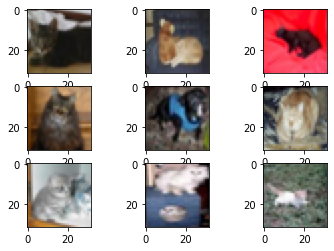

In [4]:
#Look at the first 9 images from the dataset
images = range(0,9)
for i in images:
    plt.subplot(330 + 1 + i)
    plt.imshow(x_train[i], cmap=plt.get_cmap('gray'))
    
#Show the plot
plt.show()

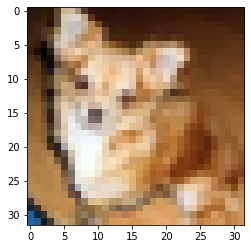

In [5]:
#Image of Dog
plt.imshow(x_train[7000], cmap=plt.get_cmap('gray'))
plt.show()

In [6]:
#Its a dog image
y_train[7000]

array([0., 1.], dtype=float32)

In [7]:
from keras import models
from keras.layers import Dense, Dropout
from keras.models import Sequential
from keras.layers import Activation, Flatten, Conv2D,MaxPooling2D
from keras.utils.vis_utils import model_to_dot
from IPython.display import SVG
from keras.preprocessing.image import ImageDataGenerator
from keras import layers
'''
model = Sequential()
#We need to use a Conv2D layer at start of the neural network 
#the syntax is Conv2D(1, (image_width,image_height), padding="valid", activation="relu", input_shape=X_train.shape[1:])
#the we add a flatten layer
model.add(Conv2D(1024, (32, 32), padding="valid", activation="relu", input_shape=x_train.shape[1:]))
model.add(Dropout(0.1))


model.add(Flatten())
#then we continue with the neural network.
model.add(layers.Dense(512,activation="relu"))
model.add(layers.Dropout(0.1))


model.add(layers.Dense(256,activation="relu"))
model.add(layers.Dropout(0.1))

model.add(layers.Dense(128,activation="relu"))
model.add(layers.Dropout(0.1))

model.add(layers.Dense(2,activation="sigmoid"))
model.summary()
'''

'\nmodel = Sequential()\n#We need to use a Conv2D layer at start of the neural network \n#the syntax is Conv2D(1, (image_width,image_height), padding="valid", activation="relu", input_shape=X_train.shape[1:])\n#the we add a flatten layer\nmodel.add(Conv2D(1024, (32, 32), padding="valid", activation="relu", input_shape=x_train.shape[1:]))\nmodel.add(Dropout(0.1))\n\n\nmodel.add(Flatten())\n#then we continue with the neural network.\nmodel.add(layers.Dense(512,activation="relu"))\nmodel.add(layers.Dropout(0.1))\n\n\nmodel.add(layers.Dense(256,activation="relu"))\nmodel.add(layers.Dropout(0.1))\n\nmodel.add(layers.Dense(128,activation="relu"))\nmodel.add(layers.Dropout(0.1))\n\nmodel.add(layers.Dense(2,activation="sigmoid"))\nmodel.summary()\n'

##Loading Dev  and Test Set

In [8]:
#code part 1 -Obtaining the Dataset
from bs4 import BeautifulSoup
import numpy as np
import requests
import cv2
import PIL.Image
import urllib

ie_page = requests.get("http://www.image-net.org/api/text/imagenet.synset.geturls?wnid=n02123045")# Cats synset
print(ie_page.content)
ie_soup = BeautifulSoup(ie_page.content, 'html.parser')#puts the content of the website into the soup variable, each url on a different line
ae_page = requests.get("http://www.image-net.org/api/text/imagenet.synset.geturls?wnid=n02084071")# Dogs synset
print(ae_page.content)
ae_soup = BeautifulSoup(ae_page.content, 'html.parser')#puts the content of the website into the soup variable, each url on a different line

b'\n<!DOCTYPE html PUBLIC "-//W3C//DTD HTML 4.01 Transitional//EN"\n   "http://www.w3.org/TR/html4/loose.dtd">\n\n<html lang="en">\n<head>\n<meta http-equiv="Content-Type" content="text/html; charset=utf-8">\n<title>ImageNet</title>\n<script src="https://www.google.com/recaptcha/api.js"></script>\n<link rel="stylesheet" type="text/css" href="/static_files/style.css">\n<link rel="shortcut icon" href="/static_files/favicon.ico">\n<link rel="icon" href="/static_files/favicon.png" type="image/png">\n<script language="JavaScript" src="/static_files/index_files/dropdownmenu.js">\n</script>\n<script type="text/javascript" language="javascript" src="/gpviewui/gpviewui.nocache.js"></script>\n<link type="text/css" rel="stylesheet" href="/GPViewUI.css">\n<script type="text/javascript"> function showemail(d,u)\n{\n  var email = u + "@" + d;\n  document.write("<a href=mailto:"+email+">"+email+"</a>");\n}\n</script>\n<script type="text/javascript"\n  src="http://cdn.mathjax.org/mathjax/latest/MathJa

In [9]:
#code part 2- Using Beautiful Soup to get the correct Outcome

ie_str_soup=str(ie_soup)#convert soup to string so it can be split
type(ie_str_soup)
ie_split_urls=ie_str_soup.split('\r\n')#split so each url is a different position on a list
print(len(ie_split_urls))#print the length of the list so you know how many urls you have

ae_str_soup=str(ae_soup)#convert soup to string so it can be split
type(ae_str_soup)
ae_split_urls=ae_str_soup.split('\r\n')#split so each url is a different position on a list
print(len(ae_split_urls))  #print the length of the list so you know how many urls you have

1
1


In [10]:
#Creating Dataframe 
!mkdir /content/catdog_dev/ 
!mkdir /content/catdog_test/ 

In [11]:
#Defining function to convert URL to images 
img_rows, img_cols = 32, 32 #number of rows and columns to convert the images to
input_shape = (img_rows, img_cols, 3)#format to store the images (rows, columns,channels) called channels last

def url_to_image(url):
	# download the image, convert it to a NumPy array, and then read
	# it into OpenCV format
	resp = urllib.request.urlopen(url)
	image = np.asarray(bytearray(resp.read()), dtype="uint8")
	image = cv2.imdecode(image, cv2.IMREAD_COLOR)
 
	# return the image
	return image

In [12]:
n_of_training_images=50   #The number of Development images to use
counter=0
for progress in range(10*n_of_training_images):#store all 200 INDIAN ELEPHANT images on a directory
    if (counter == n_of_training_images):
      break
    if (progress%10==0):
        print(progress)
    if not ie_split_urls[progress] == None:
      try:
        I = url_to_image(ie_split_urls[progress])
        if (len(I.shape))==3: #check if the image has width, length and channels
          save_path = '/content/catdog_dev/ie.'+str(progress)+'.jpg'#create a name of each image
          cv2.imwrite(save_path,I)
          counter=counter+1
          print("Counter count :",counter)
      except:
        None
print("\n ALL THE DEV SET CATS- IMAGES STORED ON THE DIRECTORY\n")
print("Total Counter :" ,counter)

counter=0
for progress in range(10*n_of_training_images):#store all 200 AFRICAN ELEPHANT images on a directory
    if (counter == n_of_training_images):
      break 
    if (progress%10==0):
        print(progress)
    if not ae_split_urls[progress] == None:
      try:
        I = url_to_image(ae_split_urls[progress])
        if (len(I.shape))==3: #check if the image has width, length and channels
          save_path = '/content/catdog_dev/ae.'+str(progress)+'.jpg'#create a name of each image
          cv2.imwrite(save_path,I)
          counter=counter+1
          print("Counter count :",counter)

      except:
        None
print("\n ALL THE DEV SET -DOGS IMAGES STORED ON THE DIRECTORY\n")
print("Total Counter :" ,counter)

0


IndexError: ignored

In [ ]:
#Storing Test Data data:
n_of_testing_images=50
counter=0
for progress in range(10*n_of_testing_images):#store all the 50INDIAN ELEPHANT TEST IMAGES on a directory
    if (counter >=n_of_testing_images):
      break
    if (progress%10==0):
        print(progress)
    if not ie_split_urls[progress] == None:
      try:
        I = url_to_image(ie_split_urls[n_of_training_images+progress])#get images that are different from the ones used for training
        if (len(I.shape))==3: #check if the image has width, length and channels
          save_path = '/content/catdog_test/ie.'+str(progress)+'.jpg'#create a name of each image
          cv2.imwrite(save_path,I)
          counter=counter+1
          print("Counter count: ",counter)
      except:
        None
print("\n ALL THE CAT TEST IMAGES STORED ON THE DIRECTORY\n")
print("Total Count: ",counter)

counter=0
for progress in range(10*n_of_testing_images):#store all 50 AFRICAN ELEPEHANT TEST IMAGES on a driectory
    if (counter >=n_of_testing_images):
      break
    if (progress%10==0):
        print(progress)
    if not ae_split_urls[progress] == None:
      try:
        I = url_to_image(ae_split_urls[n_of_training_images+progress])#get images that are different from the ones used for training
        if (len(I.shape))==3: #check if the image has width, length and channels
          save_path = '/content/catdog_test/ae.'+str(progress)+'.jpg'#create a name of each image
          cv2.imwrite(save_path,I)
          counter=counter+1
          print("Counter count: ",counter)
      except:
        None
print("\n ALL THE DOGS TEST IMAGES STORED ON THE DIRECTORY\n")
print("Total Count: ",counter)

#Save Train images to folder

In [13]:
# Path to the train folder
import os
original_train = '/content/catdog_dev'
 
filenames = os.listdir(original_train)
categories = []
for filename in filenames:
  category = filename.split('.')[0]
  if category == 'ie':
    categories.append('0')
  else:
    categories.append('1')


#Create dataframe for Development

import pandas as pd
data = pd.DataFrame({'filename':filenames,'label':categories})
data.to_csv("original_catdog_dev.csv",index=False)

In [14]:
data

,filename,label


#Similarly for test 

In [15]:
# Path to the train folder
import os
original_test = '/content/catdog_test/'
 
filenames = os.listdir(original_test)
categories = []
for filename in filenames:
  category = filename.split('.')[0]
  if category == 'ie':
    categories.append(0)
  else:
    categories.append(1)

data_test = pd.DataFrame({'filename':filenames,'label':categories})
data_test.to_csv("original_catdog_test.csv",index=False)

In [16]:
data_test

,filename,label


##Model Building

In [17]:
model = Sequential()
model.add(Conv2D(filters = 32, kernel_size = (5,5),padding = 'valid',activation ='relu', input_shape=x_train.shape[1:]))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.20))


model.add(Conv2D(filters = 64, kernel_size = (3,3),padding = 'valid',activation ='relu'))
model.add(MaxPooling2D(pool_size=(2,2), strides=(2,2)))
model.add(Dropout(0.15))


model.add(Conv2D(filters = 512, kernel_size = (3,3),padding = 'valid',activation ='relu'))
model.add(MaxPooling2D(pool_size=(2,2), strides=(2,2)))
model.add(Dropout(0.10))

model.add(Flatten())
model.add(Dense(1024))
model.add(Activation('relu'))
model.add(Dense(1, activation = "sigmoid"))
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 28, 28, 32)        2432      
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 14, 14, 32)        0         
_________________________________________________________________
dropout (Dropout)            (None, 14, 14, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 12, 12, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 6, 6, 64)          0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 6, 6, 64)          0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 4, 4, 512)         2

In [18]:
from keras.callbacks import ReduceLROnPlateau
from keras.optimizers import Adam
from keras.callbacks import ModelCheckpoint, EarlyStopping
filepath = "weights-improvement-experiment3.h5"
checkpoint = ModelCheckpoint(filepath, monitor = 'val_accuracy', verbose=1, save_best_only=True, mode='max')
es = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=20, min_delta=0.01, baseline=2.0)
red_lr= ReduceLROnPlateau(monitor='val_accuracy',patience=3,verbose=1,factor=0.1)
callbacks_list = [checkpoint, es,red_lr]

In [19]:
model.compile(loss='binary_crossentropy',optimizer=Adam(lr=0.001),metrics=['accuracy'])

In [ ]:
datagen = ImageDataGenerator(
    featurewise_center=True,
    featurewise_std_normalization=True,
    rotation_range=5,
    width_shift_range=0.2,
    height_shift_range=0.2,
    horizontal_flip=True)

datagen.fit(x_train)

dev_generator = datagen.flow_from_dataframe(dataframe=data, directory=original_train,
                                             x_col='filename',
                                             y_col='label',
                                             target_size=(32,32),
                                             class_mode='binary',
                                             #batch_size=10,
                                             #subset='validation',
                                             #shuffle=True,
                                             #seed=7,
                                            color_mode='rgb')

test_datagen=ImageDataGenerator(rescale=1./255)

test_generator=test_datagen.flow_from_dataframe(dataframe=data_test,
                                                directory="/content/catdog_test/",
                                                x_col="filename",
                                                y_col=None,
                                                #batch_size=10,
                                                #seed=7,
                                                #shuffle=False,
                                                class_mode=None,
                                                target_size=(32,32),
                                                color_mode='rgb')

In [ ]:
# fits the model on batches with real-time data augmentation:
history=model.fit(datagen.flow(x_train, y_train),epochs=50,verbose=1,callbacks=callbacks_list,validation_data=dev_generator)

###Plot of accuracy of Train & Validation

In [ ]:
import matplotlib.pyplot as plt
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title("Model accuracy")
plt.ylabel("Accuracy")
plt.xlabel("Epochs/iterations")
plt.legend(['Train','Validation'], loc="upper left")
plt.show()

###Plot of Loss of Train & Validation

In [ ]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title("Model LOSS")
plt.ylabel("Loss")
plt.xlabel("Epochs/iterations")
plt.legend(['Train','Validation'], loc="upper left")
plt.show()

#Predict the output

In [ ]:
test_generator.reset()
predictions=np.argmax(model.predict_generator(test_generator),axis=-1)

filenames=test_generator.filenames
results=pd.DataFrame({"Filename":filenames,"Predictions":predictions})

results.to_csv("results_catsdogs_test.csv",index=False)

In [ ]:
predictions

In [ ]:
results['Predictions']

In [ ]:
data_test['label']

#Error analysis & Data Mismatch

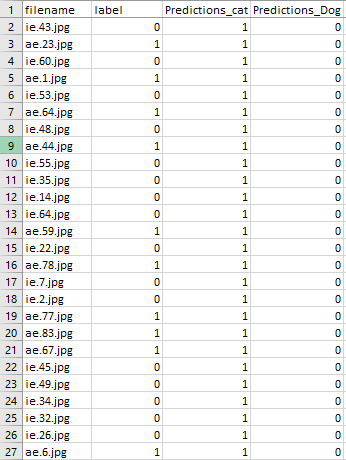

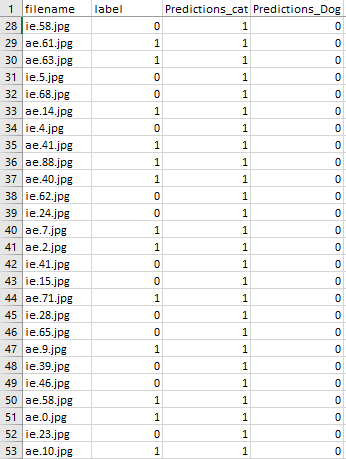

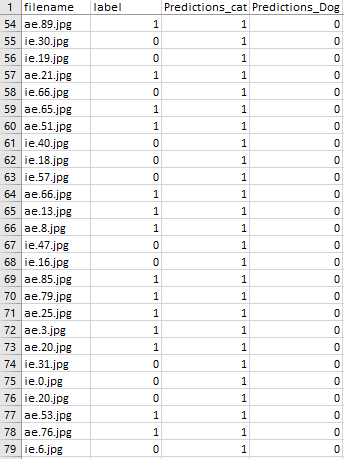

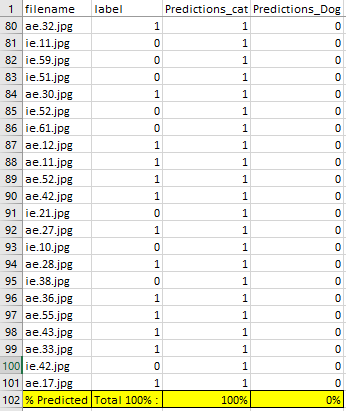

###Confusion matrix

In [ ]:
plt.figure(figsize=(10,5))
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
cm = confusion_matrix(np.asarray(data_test['label']), results['Predictions'])
ax = plt.subplot()

import seaborn as sns
sns.heatmap(cm, annot = True, ax = ax)

ax.set_xlabel('Predicted')
ax.set_ylabel('Original')
ax.set_title('Confusion_matrix')

###Classification report


In [ ]:
print(classification_report(np.asarray(data_test['label']), results["Predictions"]))

Getting the test accuracy by checking on labels


In [ ]:
score = accuracy_score(results['Predictions'],data_test["label"])
print('Test Accuracy:',score*100)

Screenshot of Accuracy:

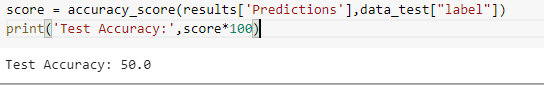
